In [1]:
def noize(cancer, e = 1):
    for i in range(cancer.shape[1]):
        size  = cancer[:,i].shape
        max_el = max(cancer[:,i])
        noise = np.random.laplace(0, max_el/e, size)
        cancer[:,i] *= noise
    return cancer

In [44]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.ensemble import RandomForestClassifier    #Random Forest
from sklearn.neural_network import MLPClassifier       #Neural Network
from sklearn.svm import SVC                            #SVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [17]:
cancer = load_breast_cancer()

In [41]:
data = pd.read_csv('train+test.csv')
X, y = data.drop(['income'], axis = 1).values, data['income'].values

In [40]:
data[['104','105', 'income']].corr()

,104,105,income
104,1.000000,-0.127858,-0.779730
105,-0.127858,1.000000,-0.521282
income,-0.779730,-0.521282,1.000000


# DecisionTreeClassifier

## without salt

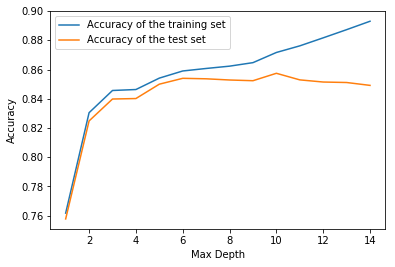

In [42]:
#----------------- Decision Tree
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

training_accuracy = []
test_accuracy = []

max_dep = range(1,15)

for md in max_dep:
    tree = DecisionTreeClassifier(max_depth=md,random_state=0)
    tree.fit(X_train,y_train)
    training_accuracy.append(tree.score(X_train, y_train))
    test_accuracy.append(tree.score(X_test, y_test))
 
plt.plot(max_dep,training_accuracy, label='Accuracy of the training set')
plt.plot(max_dep,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()

# By having larger max_depth (>5), we overfit the model into training data, so the accuracy for training set become 
# but the accuracy for test set decrease

# other parameters than can work with:
# - min_samples_leaf, max_sample_leaf
# - max_leaf_node

# by looking at plot, best result accurs when max_depth is 3

## salt

In [19]:
cancer = load_breast_cancer()

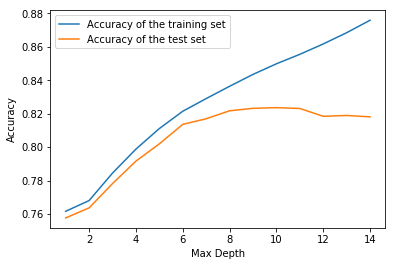

In [43]:
#----------------- Decision Tree
X_train, X_test, y_train, y_test = train_test_split(noize(X, e=0.1), y, random_state=42)

training_accuracy = []
test_accuracy = []

max_dep = range(1,15)

for md in max_dep:
    tree = DecisionTreeClassifier(max_depth=md,random_state=0)
    tree.fit(X_train,y_train)
    training_accuracy.append(tree.score(X_train, y_train))
    test_accuracy.append(tree.score(X_test, y_test))
 
plt.plot(max_dep,training_accuracy, label='Accuracy of the training set')
plt.plot(max_dep,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()

# By having larger max_depth (>5), we overfit the model into training data, so the accuracy for training set become 
# but the accuracy for test set decrease

# other parameters than can work with:
# - min_samples_leaf, max_sample_leaf
# - max_leaf_node

# by looking at plot, best result accurs when max_depth is 3

# XGBoost

In [19]:
import xgboost

In [23]:
training_accuracy = []
test_accuracy = []
xgb_tree = xgboost.XGBClassifier(max_depth=3)
xgb_tree.fit(X_train, y_train)
training_accuracy.append(xgb_tree.score(X_train, y_train))
test_accuracy.append(xgb_tree.score(X_test, y_test))

/home/i/anaconda3/envs/gpu/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/i/anaconda3/envs/gpu/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [31]:
np.argmax(xgb_tree.feature_importances_)

105

In [25]:
test_accuracy

[0.9999180999180999]

## Clear data

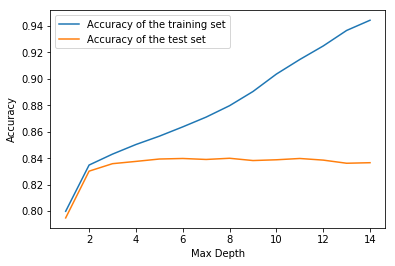

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
training_accuracy = []
test_accuracy = []
max_dep = range(1,15)
for md in max_dep:
    xgb_tree = xgboost.XGBClassifier(max_depth=md)
    xgb_tree.fit(X_train, y_train)
    training_accuracy.append(xgb_tree.score(X_train, y_train))
    test_accuracy.append(xgb_tree.score(X_test, y_test))
plt.plot(max_dep,training_accuracy, label='Accuracy of the training set')
plt.plot(max_dep,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()

## noize

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(noize(X, e=0.1), y, random_state=42)
training_accuracy = []
test_accuracy = []
max_dep = range(1,15)
for md in max_dep:
    xgb_tree = xgboost.XGBClassifier(max_depth=md)
    xgb_tree.fit(X_train, y_train)
    training_accuracy.append(xgb_tree.score(X_train, y_train))
    test_accuracy.append(xgb_tree.score(X_test, y_test))
plt.plot(max_dep,training_accuracy, label='Accuracy of the training set')
plt.plot(max_dep,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()